MSE: 0.27512974739781393
R² Score: 0.7920752849615226


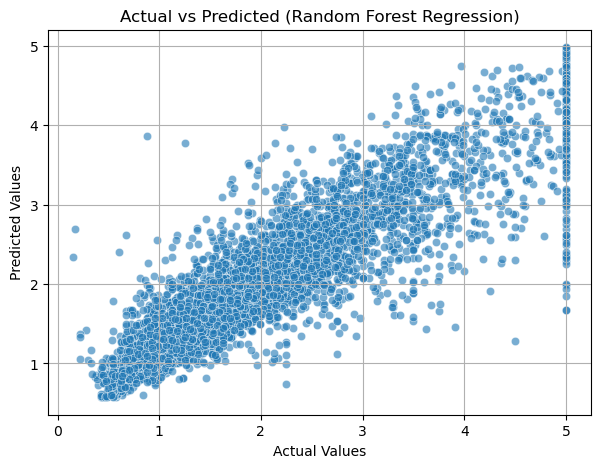

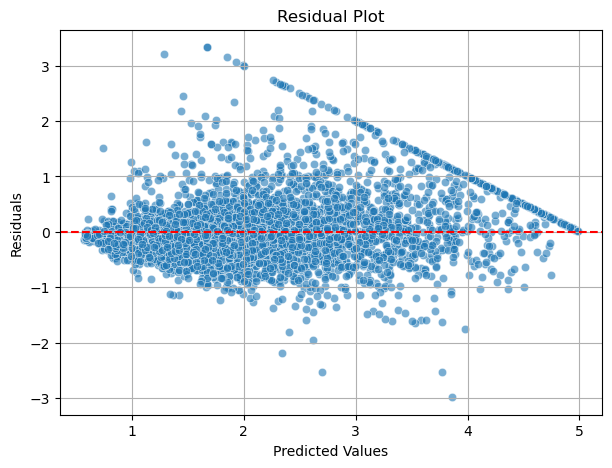

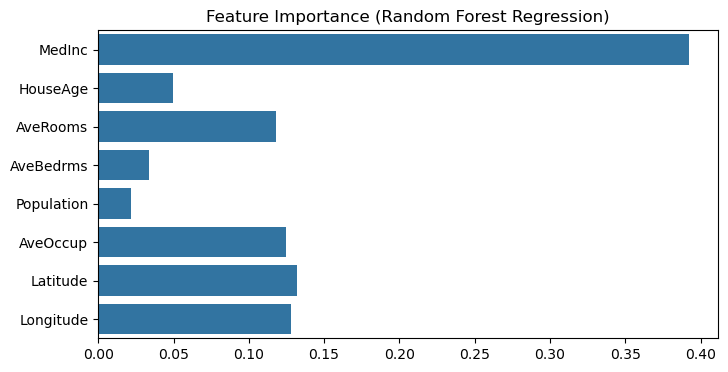

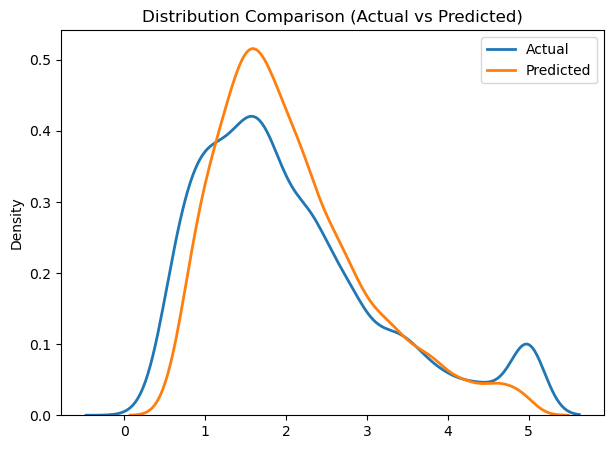

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load Data
data = fetch_california_housing()
X = data.data
y = data.target
feature_names = data.feature_names

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Model
rf_reg = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features="sqrt",
    random_state=42
)

# Train
rf_reg.fit(X_train, y_train)

# Predict
y_pred = rf_reg.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R² Score:", r2)

# 1. Actual vs Predicted
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Random Forest Regression)")
plt.grid(True)
plt.show()

# 2. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()

# 3. Feature Importance
importances = rf_reg.feature_importances_
plt.figure(figsize=(8,4))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Random Forest Regression)")
plt.show()

# 4. Distribution Comparison
plt.figure(figsize=(7,5))
sns.kdeplot(y_test, label="Actual", linewidth=2)
sns.kdeplot(y_pred, label="Predicted", linewidth=2)
plt.legend()
plt.title("Distribution Comparison (Actual vs Predicted)")
plt.show()